# Homework10 - Heart disease

By: Mathias Lund Ahrn


This project will be using logistic regression to classify if a patient has heart disease. 


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from inspect import signature

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1

### About the dataset

**Name**: Statlog (Heart) Data Set derived from Heart Disease Data Set

**Date donated**: July 1st 1988

**Donor**: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

This is a heart disease database from Cleveland, Hungary, Switzerland and the VA Long Beach.


Data hosted on [GitHub](https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv) by [Dr. Glenn Bruns](https://github.com/grbruns/cst383/blob/master/heart.csv).

# Initial Exploration

In [51]:
print("The dataset consists of {:} rows and {:} columns.".format(df.shape[0], df.shape[1]))

The dataset consists of 270 rows and 17 columns.


The target attribute is the *output* column where 0 means no heart disease and 1 means heart disease is present.

### Attribute types
There are four categories of attribute types. This section will go through each and explain those which are not *real* data.

##### Real data
- *Age*
- *Resting blood pressure (rbp)*
- *Serum cholestoral in mg/dl (chol)*
- *Maximum heart rate achieved (maxhr)* 
- *Oldpeak = ST depression induced by exercise relative to rest (dep)*
- *Number of major vessels (0-3) colored by flourosopy (fluor)*


##### Ordered data
- The slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping


##### Binary data
- Sex, female = 0 & male = 1
- Fasting blood sugar > 120 mg/dl (sugar), 0 = false & 1 = true
- Exercise induced angina (angina), 0 = no & 1 = yes

##### Nominal data
- Chest pain type (4 values) (chestpain)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- Resting electrocardiographic results (ecg)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
-  thal
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age          270 non-null int64
sex          270 non-null int64
chestpain    270 non-null int64
restbp       270 non-null int64
chol         270 non-null int64
sugar        270 non-null int64
ecg          270 non-null int64
maxhr        270 non-null int64
angina       270 non-null int64
dep          270 non-null float64
exercise     270 non-null int64
fluor        270 non-null int64
thal         270 non-null int64
output       270 non-null int64
dtypes: float64(1), int64(13)
memory usage: 29.6 KB


It seems that the dataset has no missing values (NA's).

In [44]:
df.describe()

,age,sex,restbp,chol,sugar,maxhr,angina,dep,exercise,fluor,chestpain_2,chestpain_3,chestpain_4,ecg_1,ecg_2,thal_6,thal_7
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.148148,149.677778,0.329630,1.05000,1.585185,0.670370,0.155556,0.292593,0.477778,0.007407,0.507407,0.051852,0.385185
std,9.109067,0.468195,17.861608,51.686237,0.355906,23.165717,0.470952,1.14521,0.614390,0.943896,0.363107,0.455798,0.500434,0.085906,0.500874,0.222140,0.487543
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000,153.500000,0.000000,0.80000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,0.000000,166.000000,1.000000,1.60000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.20000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at this we can see there are slightly more men in this dataset and there are people as young as 29 years old up to 77 years old with heart disease.

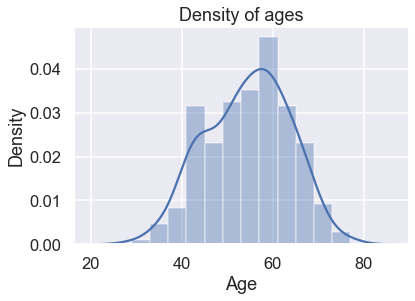

In [47]:
ages = sns.distplot(df["age"]);
plt.title("Density of ages")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show(ages);


# Initial Preprocessing

Have to convert the categorical data (chestpain, ecg and thal) into dummy data.

In [5]:
df = pd.get_dummies(df, columns=["chestpain", "ecg", "thal"], drop_first=True)

Now the dataset have been updated.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 18 columns):
age            270 non-null int64
sex            270 non-null int64
restbp         270 non-null int64
chol           270 non-null int64
sugar          270 non-null int64
maxhr          270 non-null int64
angina         270 non-null int64
dep            270 non-null float64
exercise       270 non-null int64
fluor          270 non-null int64
output         270 non-null int64
chestpain_2    270 non-null uint8
chestpain_3    270 non-null uint8
chestpain_4    270 non-null uint8
ecg_1          270 non-null uint8
ecg_2          270 non-null uint8
thal_6         270 non-null uint8
thal_7         270 non-null uint8
dtypes: float64(1), int64(10), uint8(7)
memory usage: 25.1 KB


Assigning all data except output columns to a variable X and the target column (output) to y.

In [7]:
y = df["output"].values
df = df.drop(columns=["output"])
X = df.values

# Machine Learning

In [8]:
""" This section is for helper functions """
def print_conf_mtx(y_true, y_pred, classes=None):
    """ Print a confusion matrix (two classes only). """
    
    if not classes:
        classes = ['neg', 'pos']
   	 
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left   	= '{:<10s}'.replace('10',str(n))
    right  	= '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    
    cm = confusion_matrix(y_true, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))
    

# Function that calculates precision and recall and returns a panda series with its corresponding
# name and value
def precisionAndRecall(true, predicted):
    cm = confusion_matrix(true, predicted)
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    recall = cm[1,1]/(cm[1,0]+cm[1,1])
    result = pd.Series({"precision":precision, "recall":recall})
    return result


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


def getBestFeaturesCV(X_trainz, y_trainz):
    remaining = list(range(X_trainz.shape[1]))
    selected = []
    n = 10
    while len(selected) < n:
        # find the single features that works best in conjunction
        # with the already selected features
        accuracy_max = -1e7
        for i in remaining:
            selected.append(i)
            scores = cross_val_score(LogisticRegression(), X_trainz[:,selected], y_trainz, scoring='accuracy', cv=5)
            accuracy = scores.mean()
            selected.pop()
            if(accuracy > accuracy_max):
                accuracy_max = accuracy
                i_max = i

        remaining.remove(i_max)
        selected.append(i_max)
        print('num features: {}; accuracy: {:.2f}'.format(len(selected), accuracy_max))
    return selected

def getBestFeatures(X_trainz, y_trainz, X_testz, y_testz):
    remaining = list(range(X_trainz.shape[1]))
    selected = []
    n = 10
    while len(selected) < n:
        # find the single features that works best in conjunction
        # with the already selected features
        accuracy_max = -1e7
        for i in remaining:
            selected.append(i)
            log = LogisticRegression()
            log.fit(X_trainz[:,selected], y_trainz)
            predicts = log.predict(X_testz[:,selected])
            accuracy = (predicts == y_testz).mean()
            selected.pop()
            if(accuracy > accuracy_max):
                accuracy_max = accuracy
                i_max = i

        remaining.remove(i_max)
        selected.append(i_max)
        print('num features: {}; accuracy: {:.2f}'.format(len(selected), accuracy_max))
    return selected


def precisionRecallCurve(y_testz, prob_predictsz):
    precision, recall, thresholds = precision_recall_curve(y_testz, prob_predictsz)

    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.show()

The first thing to do is, create training and test data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Find the coefficients for the model.

In [10]:
log = LogisticRegression()
log.fit(X, y)

print("Intercept: {:.2f}".format(log.intercept_[0]))
print("Coefficients:")
name = 0
for i in log.coef_[0]:
    print(" ",df.columns[name]+":", "{:.2f}".format(i))
    name += 1

Intercept: -0.51
Coefficients:
  age: -0.04
  sex: 1.11
  restbp: 0.02
  chol: 0.01
  sugar: -0.19
  maxhr: -0.03
  angina: 0.53
  dep: 0.40
  exercise: 0.25
  fluor: 1.04
  chestpain_2: 0.22
  chestpain_3: -0.26
  chestpain_4: 1.26
  ecg_1: 0.07
  ecg_2: 0.48
  thal_6: 0.02
  thal_7: 1.35


Based on the output from the model above we can read that restbp, chol and ecg_1 will not have any effect on predictions. 

Features that have a big impact on predictions are:
- sex
- fluor
- chestpain_4 (asymptomatic)
- thal_7 (reversable defect)

With this information, those will be the selected features for the first part of predictions.

### Predicting with sex, fluor, chestpain_4 and thal_7

In [11]:
X = df[["sex","fluor","chestpain_4","thal_7"]].values

Creating test and training data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
log = LogisticRegression()
log.fit(X_train, y_train)

predicts = log.predict(X_test)

print("Accuracy with sex, fluor, chestpain_4 and thal_7: {:.2f}.".format(log.score(X_test, y_test)))

Accuracy with sex, fluor, chestpain_4 and thal_7: 0.81.


In [14]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=5)
print("Average accuracy with sex, fluor, chestpain_4 and thal_7 using cross validation with 5 folds: {:.2f}".format(scores.mean()))

Average accuracy with sex, fluor, chestpain_4 and thal_7 using cross validation with 5 folds: 0.87


The accuracy shown with these four features seems to work good. With cross validation the accuracy goes up by 5 percentage points.

###### Confusion matrix

In [15]:
print_conf_mtx(y_test, predicts)

       predicted 
actual   neg  pos
neg       34    6
pos        7   21


###### Precision and recall

In [16]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, predicts)[0], precisionAndRecall(y_test, predicts)[1]))

Precision: 0.78 Recall: 0.75


Confusion matrix, precision and recall with probability predictions

In [17]:
threshold = 0.5
prob_heart_disease = log.predict_proba(X_test)[:,1]
prob_predicts = (prob_heart_disease > threshold).astype(int)

print_conf_mtx(y_test, prob_predicts)

       predicted 
actual   neg  pos
neg       34    6
pos        7   21


In [18]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, prob_predicts)[0], precisionAndRecall(y_test, prob_predicts)[1]))

Precision: 0.78 Recall: 0.75


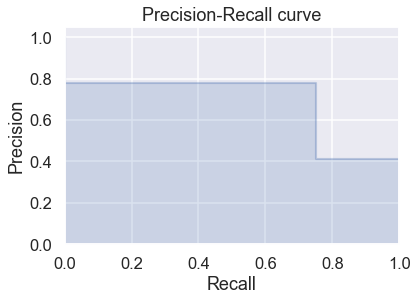

In [19]:
precisionRecallCurve(y_test, prob_predicts)

#### ROC / AUC

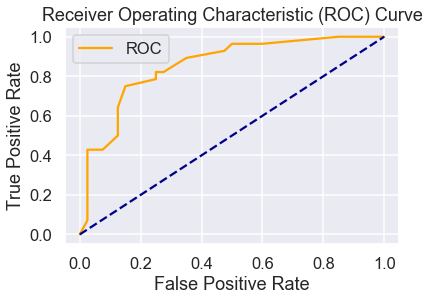

In [20]:
probs = log.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [21]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.85


The result for this ROC gives an AUC at 0.85. This can be considered as a good result.

### Finding the *best* set of feature(s) with forward feature selection

After selecting the features by looking at the coefficients, we can look at how to find a better set of features using the well known forward feature selection algorithm. This [Article](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/) is a great resource for how this algorithm works.

Updating data set to include all features.

In [22]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Best features with cross validation

For the result of the below calculations we can see that for the highest accuracy with cross validation we need the following features:
- chestpain_4, dep, fluor, thal_7, sex, maxhr

Without cross validation the following features is needed to get highest accuracy:
- thal_7, maxhr, chestpain_3, restbp

In [23]:
best_index = getBestFeaturesCV(X_train, y_train)
print(df.columns[best_index].values)

num features: 1; accuracy: 0.78
num features: 2; accuracy: 0.79
num features: 3; accuracy: 0.85
num features: 4; accuracy: 0.85
num features: 5; accuracy: 0.87
num features: 6; accuracy: 0.88
num features: 7; accuracy: 0.88
num features: 8; accuracy: 0.88
num features: 9; accuracy: 0.88
num features: 10; accuracy: 0.87
['chestpain_4' 'dep' 'fluor' 'thal_7' 'sex' 'maxhr' 'sugar' 'ecg_1'
 'thal_6' 'restbp']


In [24]:
X = df[["chestpain_4", "dep", "fluor", "thal_7"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log = LogisticRegression()
log.fit(X_train, y_train)

predicts = log.predict(X_test)

###### Confusion Matrix

In [25]:
print_conf_mtx(y_test, predicts)

       predicted 
actual   neg  pos
neg       31    9
pos        6   22


###### Precision/Recall

In [26]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, predicts)[0], precisionAndRecall(y_test, predicts)[1]))

Precision: 0.71 Recall: 0.79


Confusion matrix, precision and recall with probability predictions

In [27]:
threshold = 0.5
prob_heart_disease = log.predict_proba(X_test)[:,1]
prob_predicts = (prob_heart_disease > threshold).astype(int)

print_conf_mtx(y_test, prob_predicts)

       predicted 
actual   neg  pos
neg       31    9
pos        6   22


In [28]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, prob_predicts)[0], precisionAndRecall(y_test, prob_predicts)[1]))

Precision: 0.71 Recall: 0.79


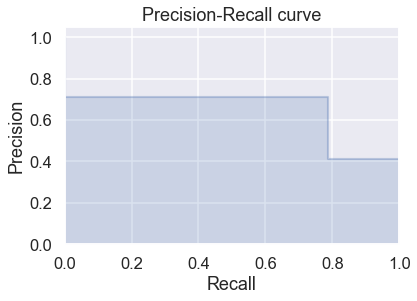

In [29]:
precisionRecallCurve(y_test, prob_predicts)

###### ROC/AUC

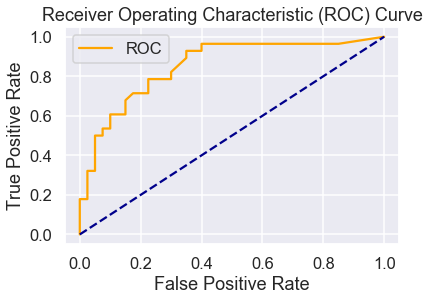

In [30]:
probs = log.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [31]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.85


The result for this ROC gives an AUC at 0.85. This can be considered as a good result.

### Best features without cross validation

In [32]:
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
best_index = getBestFeatures(X_train, y_train, X_test, y_test)
print(df.columns[best_index].values)

num features: 1; accuracy: 0.79
num features: 2; accuracy: 0.81
num features: 3; accuracy: 0.84
num features: 4; accuracy: 0.87
num features: 5; accuracy: 0.87
num features: 6; accuracy: 0.87
num features: 7; accuracy: 0.87
num features: 8; accuracy: 0.87
num features: 9; accuracy: 0.87
num features: 10; accuracy: 0.85
['thal_7' 'maxhr' 'chestpain_3' 'restbp' 'chol' 'sex' 'sugar' 'ecg_1'
 'thal_6' 'age']


In [34]:
X = df[["chestpain_4", "dep", "fluor", "thal_7"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log3 = LogisticRegression()
log3.fit(X_train, y_train)

predicts = log3.predict(X_test)

###### Confusion Matrix

In [35]:
print_conf_mtx(y_test, predicts)

       predicted 
actual   neg  pos
neg       31    9
pos        6   22


###### Precision/Recall

In [36]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, predicts)[0], precisionAndRecall(y_test, predicts)[1]))

Precision: 0.71 Recall: 0.79


Confusion matrix, precision and recall with probability predictions

In [37]:
threshold = 0.5
prob_heart_disease = log.predict_proba(X_test)[:,1]
prob_predicts = (prob_heart_disease > threshold).astype(int)

print_conf_mtx(y_test, prob_predicts)

       predicted 
actual   neg  pos
neg       31    9
pos        6   22


In [38]:
print("Precision: {:.2f} Recall: {:.2f}"
      .format(precisionAndRecall(y_test, prob_predicts)[0], precisionAndRecall(y_test, prob_predicts)[1]))

Precision: 0.71 Recall: 0.79


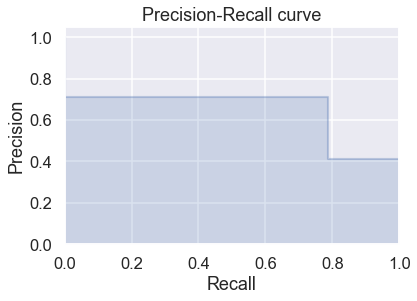

In [39]:
precisionRecallCurve(y_test, prob_predicts)

###### ROC/AUC

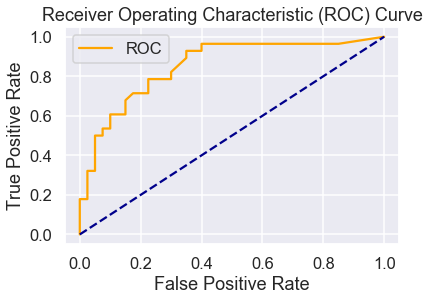

In [40]:
probs = log.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [41]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.85


The result for this ROC gives an AUC at 0.85. This can be considered as a good result.

### Conclusion

To determine if a patient has heart disease or not, we can see that knowing sex, fluor, chestpain_4 (asymptomatic), thal_7 (reversable defect) gives pretty good accuracy. Comparing these results with forward feature selection we can see a great improvement of the accuracy. The best accuracy for this dataset is by using chestpain_4, dep, fluor, thal_7, sex, maxhr at 88 percent.

For ROC/AUC and precision/recall it seems to have a bug in the code somewhere, because the reusults are the same.